In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
from fast_histogram import histogram1d, histogram2d
from matplotlib import animation
from IPython.display import HTML # requires ffmpeg
from astropy.wcs import WCS
from astropy.time import Time 
import astropy.time as atime

In [3]:
skypos = (352.9378,-2.7447) # position of AF Psc

In [4]:
tess_path = '/Users/katborski/Documents/GitHub/AFPSC/TESS/'
swift_path = '/Users/katborski/Documents/GitHub/AFPSC/Swift/'

In [5]:
event_files = []
for visit in os.listdir(swift_path):
    if visit == '00087201006': # Does not have event data
        continue
    if visit == '00014769003': # Does not have data
        continue
    visit_path = swift_path+visit+'/'
    print(visit_path)
#     for img in os.listdir(visit_path+'uvot/event/'):
#         fn=visit_path+'uvot/event/'+img
#     for fn in os.listdir(swift_path):
#         fn=swift_path+fn+'/uvot/event/'+img
    if 'DS_Store' in visit_path:
        continue
#     print(fn)

    for img in os.listdir(visit_path+'uvot/event/'):
        img_path=visit_path+'uvot/event/'+img

    data = fits.open(img_path)
    event_files+=[img_path]
        # Plot a crude light curve
#        plt.figure(figsize=(15,3))
#        plt.title(visit)
#        raw_expt = np.floor(data[0].header['TSTOP']-data[0].header['TSTART'])
#        events = data[1].data
#        gcr = len(events['TIME']/raw_expt)
#        lc,_=histogram(events['TIME'],bins=int(raw_expt/10))
#        plt.errorbar(np.arange(len(lc)),lc,yerr=3*np.sqrt(lc))
        #plt.ylim([gcr,2*gcr])
        
        # Plot a full depth image
#        plt.figure(figsize=(10,10))
#        plt.figure(figsize=(10,10))
#        img = histogram2d(events['X'],events['Y'],bins=800,range=[[events['X'].min(),events['X'].max()],
#                                                                      [events['Y'].min(),events['Y'].max()]])
#        plt.imshow(np.log10(img))
print(len(event_files))

/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769002/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769005/
/Users/katborski/Documents/GitHub/AFPSC/Swift/.DS_Store/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769004/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769021/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769019/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769026/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769010/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769028/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769017/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769016/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769011/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769018/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769027/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769020/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769006/
/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769001/

In [32]:
event_files[12]

'/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769027/uvot/event/sw00014769027uuuw1po_uf.evt.gz'

In [64]:
def swift_time_to_utc(time,epoch = atime.Time('2001-01-01 00:00:00')):
    dt_start = atime.TimeDelta(time,format='sec')
    return (epoch+dt_start).mjd

/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769027/uvot/event/sw00014769027uuuw1po_uf.evt.gz
59466.4395926625 59466.45550841412


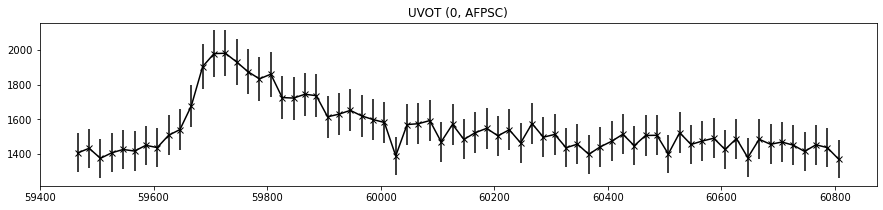

In [65]:
for j,fn in enumerate([event_files[12]]):
    f = fits.open(fn)
    print(fn)
    data = fits.open(fn)
    events = data[1].data
    t=np.array(events['TIME'])
    x=np.array(events['X'])
    y=np.array(events['Y'])

    ra=(x-data[1].header['TCRPX6'])*data[1].header['TCDLT6']+data[1].header['TCRVL6']
    dec=(y-data[1].header['TCRPX7'])*data[1].header['TCDLT7']+data[1].header['TCRVL7']

    ix=np.digitize(t,np.arange(t.min(),t.max(),20))

    margin = 0.01 # degrees

    #fig = plt.figure(figsize=(10,10))
    #plt.title(f"UVOT ({fn.split('/')[5]})")
    #plt.xticks([])
    #plt.yticks([])
    #plt.tight_layout()

    ims = []
    lc = []
    for i in np.unique(ix)[:-1]:
        frame = histogram2d(ra[np.where(ix==i)],
                            dec[np.where(ix==i)],
                            bins=133,
                            range=[[skypos[0]-margin,skypos[0]+margin],
                                   [skypos[1]-margin,skypos[1]+margin]])
        lc+=[frame.sum()]
    #    ims.append([plt.imshow(np.log10(frame),cmap="Greys")])

    tstart = swift_time_to_utc(t[0])
    tstop = swift_time_to_utc(t[-1])
    
    plt.figure(figsize=(15,3))
    plt.title(f"UVOT ({j}, {fn.split('/')[5]})")
    plt.errorbar(tstart+np.arange(len(lc))*20,lc,yerr=3*np.sqrt(lc),fmt='kx-')

    #ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat=True)

    #HTML(ani.to_html5_video())
    print(tstart,tstop)

/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769027/uvot/event/sw00014769027uuuw1po_uf.evt.gz
59466.4395926625 59466.45550841412


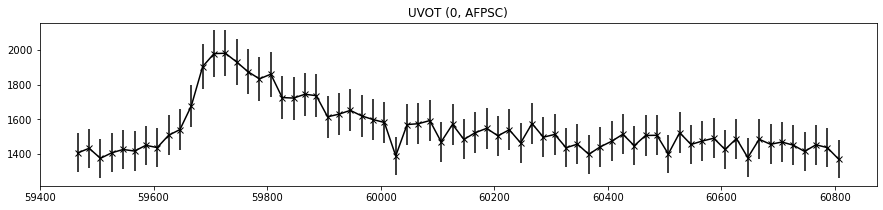

In [90]:
for j,fn in enumerate([event_files[12]]):
    f = fits.open(fn)
    print(fn)
    data = fits.open(fn)
    events = data[1].data
    t=np.array(events['TIME'])
    x=np.array(events['X'])
    y=np.array(events['Y'])

    ra=(x-data[1].header['TCRPX6'])*data[1].header['TCDLT6']+data[1].header['TCRVL6']
    dec=(y-data[1].header['TCRPX7'])*data[1].header['TCDLT7']+data[1].header['TCRVL7']

    ix=np.digitize(t,np.arange(t.min(),t.max(),20))

    margin = 0.01 # degrees

    #fig = plt.figure(figsize=(10,10))
    #plt.title(f"UVOT ({fn.split('/')[5]})")
    #plt.xticks([])
    #plt.yticks([])
    #plt.tight_layout()

    ims = []
    lc = []
    for i in np.unique(ix)[:-1]:
        frame = histogram2d(ra[np.where(ix==i)],
                            dec[np.where(ix==i)],
                            bins=133,
                            range=[[skypos[0]-margin,skypos[0]+margin],
                                   [skypos[1]-margin,skypos[1]+margin]])
        lc+=[frame.sum()]
    #    ims.append([plt.imshow(np.log10(frame),cmap="Greys")])

    tstart = swift_time_to_utc(t[0])
    tstop = swift_time_to_utc(t[-1])
    
    plt.figure(figsize=(15,3))
    plt.title(f"UVOT ({j}, {fn.split('/')[5]})")
    plt.errorbar(tstart+np.arange(len(lc))*20,lc,yerr=3*np.sqrt(lc),fmt='kx-')

    #ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat=True)

    #HTML(ani.to_html5_video())
    print(tstart,tstop)


In [116]:
atime.Time(tstart,format='jd').unix

len(np.arange(atime.Time(tstart,format='jd').unix,
                       atime.Time(tstop,format='jd').unix,20)[:-1])

68

In [117]:
len(ims)

0

In [118]:
obstimes.mjd+ 2400000.5 

array([2459457.18114583, 2459457.19994213])

In [119]:
tess_fn = '/Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'
tess_data = fits.open(tess_fn)

In [120]:
tess_data[1].data['TIME']

array([2447.68999325, 2447.69022474, 2447.69045624, ..., 2473.1654577 ,
       2473.16568918, 2473.16592066])

In [121]:
tesstime = tess_data[1].data['TIME']+2457000
ix = np.where(np.isfinite(tesstime))


In [127]:
atime.Time(tesstime[ix],format='jd').jd

array([2459447.68999325, 2459447.69022474, 2459447.69045624, ...,
       2459473.1654577 , 2459473.16568918, 2459473.16592066])

<ErrorbarContainer object of 3 artists>

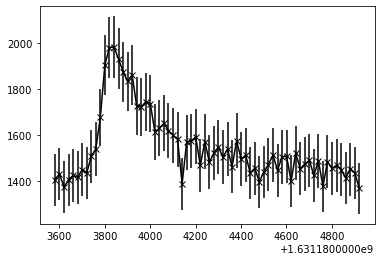

In [136]:
plt.figure()
plt.errorbar(np.arange(atime.Time(tstart,format='mjd').unix,
                       atime.Time(tstop,format='mjd').unix,20)[:-1],lc,yerr=3*np.sqrt(lc),fmt='kx-')
#plt.xlim([x.min(),x.max()])

Text(0, 0.5, 'PDCSAP_FLUX')

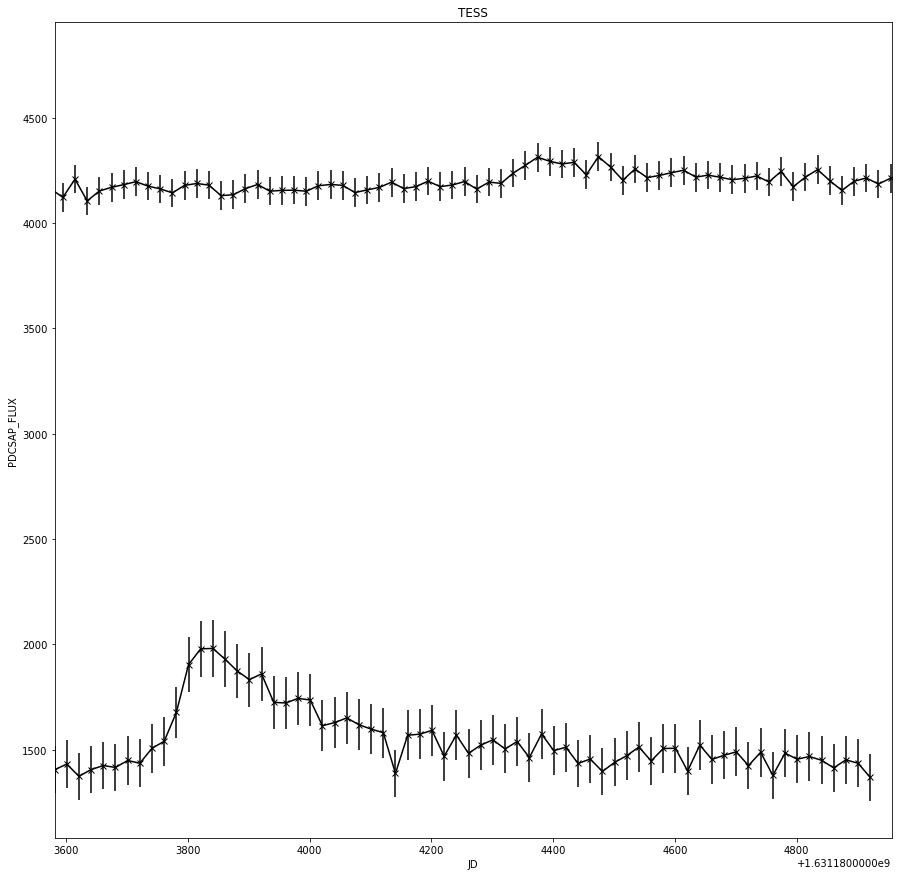

In [126]:
# BJD - 2457000
plt.figure(figsize=(15,15))
plt.title('TESS')
tesstime = tess_data[1].data['TIME']+2457000
ix = np.where(np.isfinite(tesstime))
atime.Time(tesstime[ix],format='jd').mjd
plt.errorbar(np.arange(atime.Time(tstart,format='mjd').unix,
                       atime.Time(tstop,format='mjd').unix,20)[:-1],lc,yerr=3*np.sqrt(lc),fmt='kx-')
plt.errorbar(atime.Time(tesstime[ix],format='jd').unix,tess_data[1].data['PDCSAP_FLUX'][ix],
             yerr=tess_data[1].data['PDCSAP_FLUX_ERR'][ix]*3,fmt='kx-')
plt.xlim([atime.Time(tstart,format='mjd').unix, atime.Time(tstop,format='mjd').unix])
plt.xlabel('JD')
plt.ylabel('PDCSAP_FLUX')
#plt.ylim([4000,4400])

In [47]:
atime.Time(tesstime[ix],format='jd').mjd


array([59447.18999325, 59447.19022474, 59447.19045624, ...,
       59472.6654577 , 59472.66568918, 59472.66592066])